In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# File to load
city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"


In [3]:
# Read the ride data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [4]:
# Get the columns and the rows that are not null.
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [5]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values of the type of city.
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the Urban cities.
sum(city_data_df['type']=="Urban")

66

In [9]:
# Get the number of data points from the Rural cities.
sum(city_data_df['type']=="Rural")

18

In [10]:
# Get the number of data points from the Suburban cities.
sum(city_data_df['type']=="Suburban")

36

In [11]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
## Get the columns and the rows that are null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df,city_data_df, how="left", on=["city","city"])
# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Create the Suburban and Rural city DataFrames.
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [17]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [18]:
# Get the number of rides for Rural cities.
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [19]:
# Get the number of rides for urban cities.
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [20]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
# Get average fare for each city in the Rural cities.r
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [22]:
# Get average fare for each city in the Suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [23]:
# Get the average number of drivers for each rural city.
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count.head() 


city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [24]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head() 

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [25]:
# Get the average number of drivers for each suburban city.
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count.head() 

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

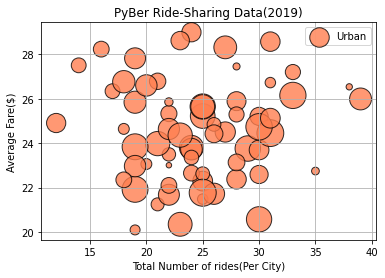

In [26]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
            urban_avg_fare, s=10*urban_driver_count,edgecolor ='k',linewidth=1,c="coral", alpha=0.8,label="Urban" )
# add title
plt.title('PyBer Ride-Sharing Data(2019)')
# Add labels
plt.xlabel('Total Number of rides(Per City)')
plt.ylabel('Average Fare($)')
# Add grid
plt.grid()
# Add legend
plt.legend()
plt.show()

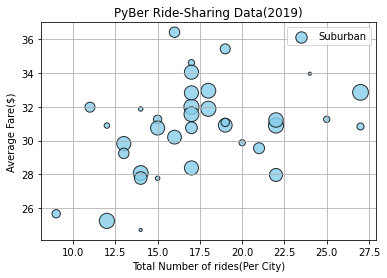

In [27]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
            suburban_avg_fare, s=10*suburban_driver_count,edgecolor ='k',linewidth=1,c="skyblue", alpha=0.8,label="Suburban" )
# add title
plt.title('PyBer Ride-Sharing Data(2019)')
# Add labels
plt.xlabel('Total Number of rides(Per City)')
plt.ylabel('Average Fare($)')
# Add grid
plt.grid()
# Add legend
plt.legend()
plt.show()

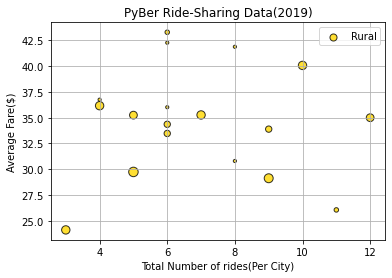

In [49]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
            rural_avg_fare, s=10*rural_driver_count,edgecolor ='k',linewidth=1,c="gold", alpha=0.8,label="Rural" )
# add title
plt.title('PyBer Ride-Sharing Data(2019)')
# Add labels
plt.xlabel('Total Number of rides(Per City)')
plt.ylabel('Average Fare($)')
# Add grid
plt.grid()
# Add legend
plt.legend()
plt.show()

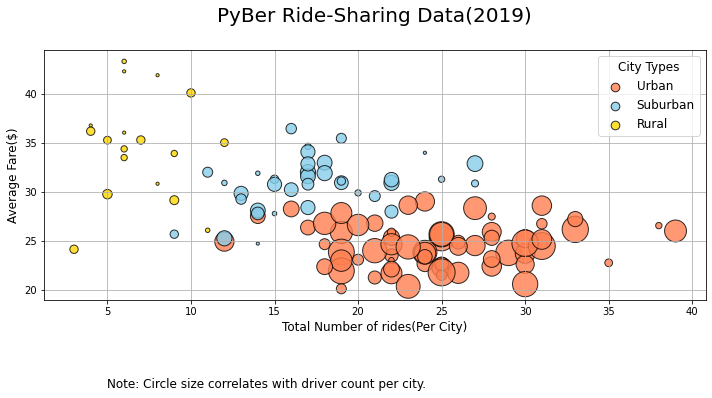

In [84]:
### Build the scatter plots for urban cities.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
            urban_avg_fare, s=10*urban_driver_count,edgecolor ='k',linewidth=1,c="coral", alpha=0.8,label="Urban" )

# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
            suburban_avg_fare, s=10*suburban_driver_count,edgecolor ='k',linewidth=1,c="skyblue", alpha=0.8,label="Suburban" )


# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
            rural_avg_fare, s=10*rural_driver_count,edgecolor ='k',linewidth=1,c="gold", alpha=0.8,label="Rural" )

# Incorporate the other graph properties
# add title
plt.title('PyBer Ride-Sharing Data(2019)\n ',fontsize=20)
# Add labels
plt.xlabel('Total Number of rides(Per City)',fontsize=12)
plt.ylabel('Average Fare($)',fontsize=12)
# Add grid
plt.grid()
# Create a legend
# Urban suburban and rural fontsize 
lgnd = plt.legend(fontsize="12",
          mode="Expended",scatterpoints=1,loc=0, title="City Types")
# marker size
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
# Title(City Types) fonsize
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(5, 10, "Note: Circle size correlates with driver count per city.", fontsize="12")
plt.tight_layout()
# Save the figure.
plt.savefig("analysis/Fig1.jpg")
plt.show()


In [30]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [38]:
# Get summary statistics for the cities data.
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [40]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [34]:
# Get summary statistics.
urban_ride_count.describe()


count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [41]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [42]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [43]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(rural_ride_count.mean(),2),round(suburban_ride_count.mean(),2)

(24.62, 6.94, 17.36)

In [44]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [45]:
suburban_ride_count.mode()

0    17
dtype: int64

In [51]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [61]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count= np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62
The median for the ride counts for urban trips is 24.0
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [62]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
mode_suburban_ride_count

ModeResult(mode=array([17], dtype=int64), count=array([7]))

In [65]:
mode_rural_ride_count = sts.mode(rural_ride_count)
mode_rural_ride_count

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [66]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [67]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [69]:
rural_fares = rural_cities_df['fare']
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")



The mean fare price for rural trips is $34.62.


In [71]:
suburban_fares = suburban_cities_df['fare']
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

The mean fare price for suburban trips is $30.97.


In [72]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [80]:
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean for the counts of the urban drivers per city is {mean_urban_drivers:.0f}")
median_urban_drivers = np.median(urban_drivers)
print(f"median_urban_drivers \n{median_urban_drivers}")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"mode_urban_drivers \n{mode_urban_drivers}")

The mean for the counts of the urban drivers per city is 37
median_urban_drivers 
37.0
mode_urban_drivers 
ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [83]:
suburban_drivers = suburban_cities_df['driver_count']
mean_subrban_drivers = np.mean(suburban_drivers)
print(f"The mean for the counts of the subrban drivers per city is {mean_subrban_drivers:.0f}")


The mean for the counts of the subrban drivers per city is 14
